# 图像分类数据集探索统计


## 各类别数据个数柱状图

### 导入工具包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 设置中文字体（选择对应的操作系统）

In [2]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [3]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [2]:
import matplotlib as plt
print(plt.get_cachedir() ) # matplotlib字体缓存 位置
print(plt.matplotlib_fname())  # matploltib配置文件地址

/root/.cache/matplotlib
/opt/conda/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


In [33]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 运行完毕后重启 kernel，再从头运行一次
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O  /opt/conda/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/SimHei.ttf
!rm -rf /root/.cache/matplotlib


--2023-01-17 02:24:58--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/x-font-ttf]
Saving to: ‘/opt/conda/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/SimHei.ttf’

/opt/conda/lib/pyth 100%[===================>]   9.58M  1.99MB/s    in 4.8s    

2023-01-17 02:25:03 (1.99 MB/s) - ‘/opt/conda/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/SimHei.ttf’ saved [10050868/10050868]



In [9]:
import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

### 导入数据集统计表格

In [2]:
df = pd.read_csv('数据量统计.csv')

In [3]:
df.shape

(81, 4)

In [4]:
df

,class,trainset,testset,total
0,莲雾,156,39,195
1,黄桃,155,38,193
2,圣女果,158,39,197
3,芒果,139,34,173
4,菠萝,158,39,197
...,...,...,...,...
76,金桔,145,36,181
77,红苹果,142,35,177
78,青柠,119,29,148
79,木瓜,156,38,194


### 图像数量柱状图可视化

In [5]:
# 指定可视化的特征
feature = 'total'
# feature = 'trainset'
# feature = 'testset'

In [6]:
df = df.sort_values(by=feature, ascending=False) 

In [7]:
df.head() 

,class,trainset,testset,total
80,腰果,160,40,200
74,白萝卜,160,39,199
67,油桃,160,39,199
64,菠萝蜜,160,39,199
36,葡萄-红,160,39,199


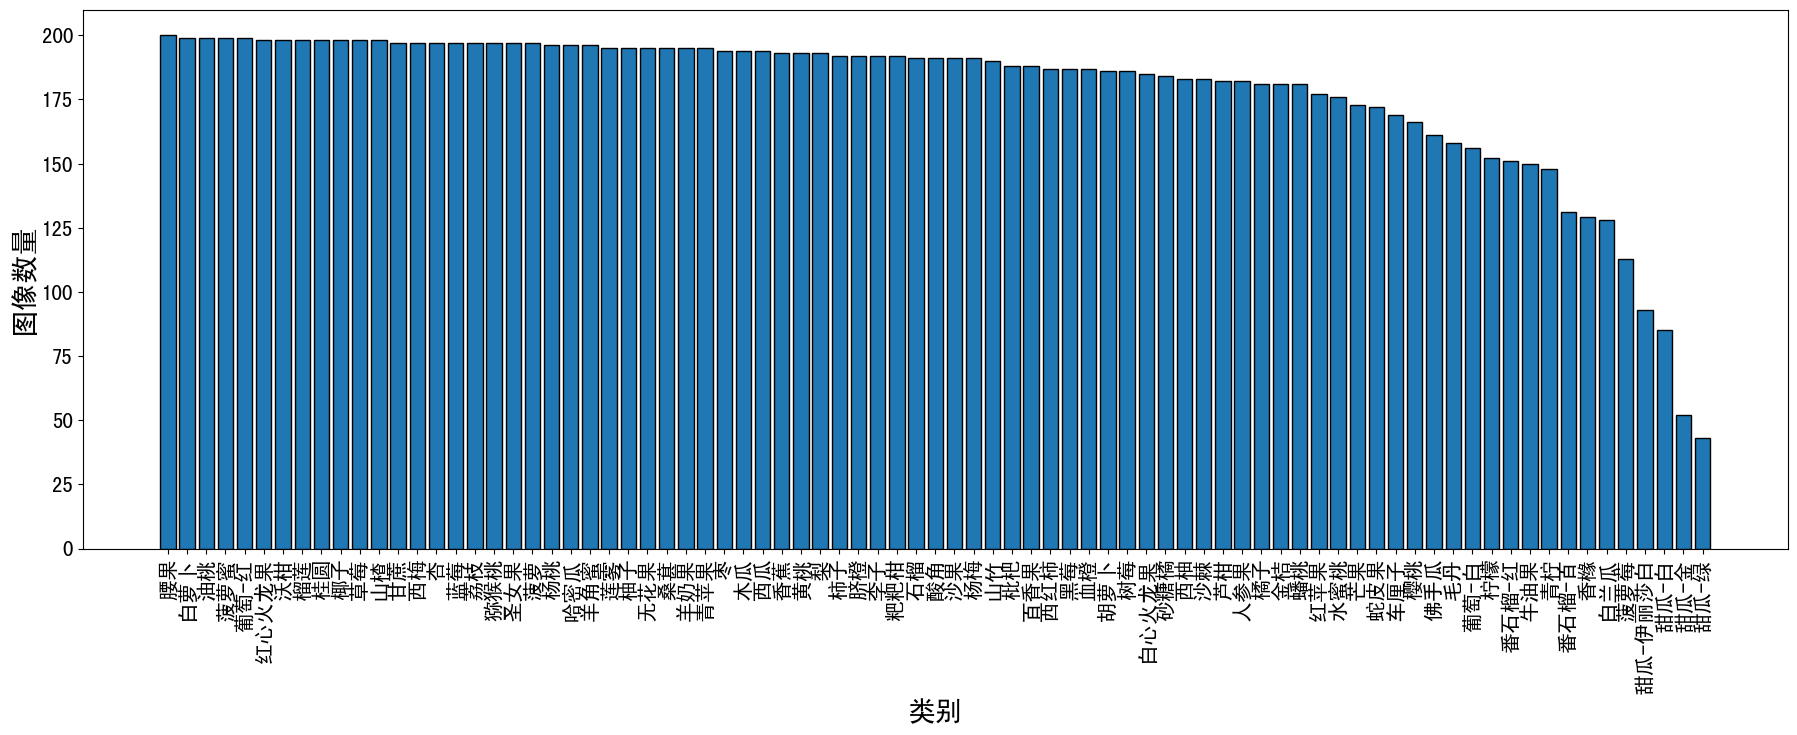

In [10]:
plt.figure(figsize=(22, 7))

x = df['class']
y = df[feature]

plt.bar(x, y, facecolor='#1f77b4', edgecolor='k')

plt.xticks(rotation=90)
plt.tick_params(labelsize=15)
plt.xlabel('类别', fontsize=20)
plt.ylabel('图像数量', fontsize=20)

# plt.savefig('各类别图片数量.pdf', dpi=120, bbox_inches='tight')

plt.show()  

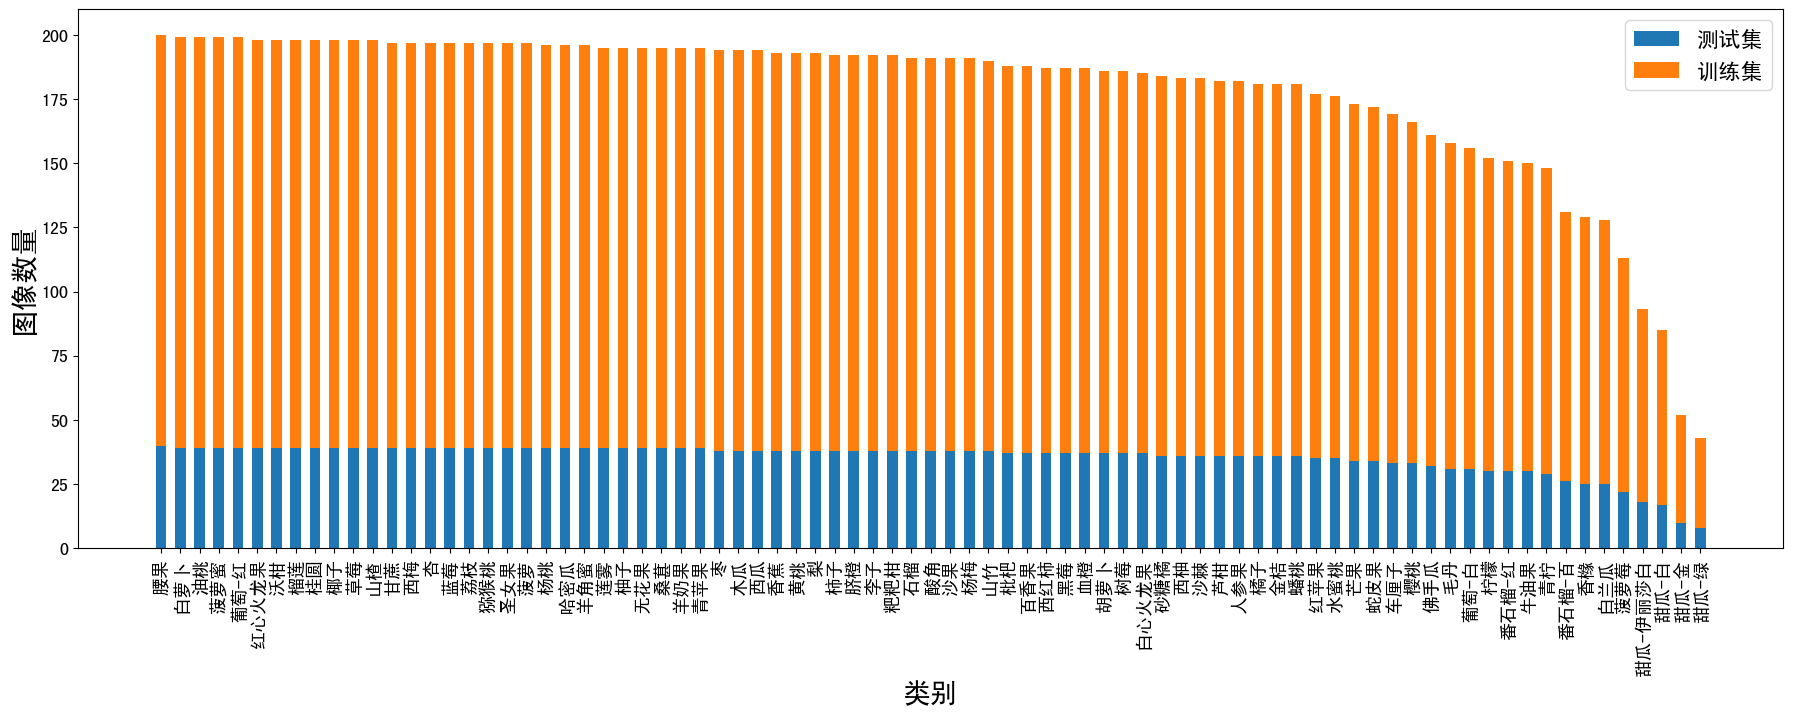

In [11]:
plt.figure(figsize=(22, 7))
x = df['class']
y1 = df['testset']
y2 = df['trainset']

width = 0.55 # 柱状图宽度

plt.xticks(rotation=90) # 横轴文字旋转

plt.bar(x, y1, width, label='测试集')
plt.bar(x, y2, width, label='训练集', bottom=y1)


plt.xlabel('类别', fontsize=20)
plt.ylabel('图像数量', fontsize=20)
plt.tick_params(labelsize=13) # 设置坐标文字大小

plt.legend(fontsize=16) # 图例

# 保存为高清的 pdf 文件
plt.savefig('各类别图像数量.pdf', dpi=120, bbox_inches='tight')

plt.show()